# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [162]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [163]:
# Read dataset abtest.csv and load into a dataframe
df = pd.read_csv("abtest.csv")

### Data Overview
<b>View a few rows of the data frame</b>

In [5]:
df.head() # Returns first 5 rows in the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


<b> Check the shape and data types of the data frame. Add observations</b>

In [6]:
df.shape

(100, 6)

#### Observations:
There are 100 rows and 6 columns in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Each row represents time spent by a user on E-News Express landing page in a preferred language with corresponding group and conversion status. <b> There is one column user_id of type integer, one column time_spent_on_the_page of type float, and four columns group, landing_page, converted and language_preferred of type object. </b>

<b> Fix the data-types (if needed) </b>

In [8]:
#Converting object columns to category for ease of analysis and visualisation, and reduced memory consumption
df["group"] = df["group"].astype("category")
df["landing_page"] = df["landing_page"].astype("category")
df["converted"] = df["converted"].astype("category")
df["language_preferred"] = df["language_preferred"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:

All four object columns have now been converted to type category. <b> This makes the variable data readable for visual analysis, as well as reduces memory usage. In this instance, the memory usage has reduced from 4.8+ KB to 2.6 KB (nearly 50%)</b>

<b> Missing Value Check </b>

In [10]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
<b> There are no missing values in the data </b>

<b> Summary statistics from the data frame. Add observations </b>

In [17]:
df[["time_spent_on_the_page"]].describe().T # Only time_spent_on_the_page is a relevant numeric field for statistical analysis


,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:
- There are 100 users in the dataset with time spent on landing page ranging from 0.19 minutes to 10.71 minutes. 
- The data appears to have a normal distribution. The mean is almost same as the median (50th percentile). 

In [29]:
df[["group","landing_page"]].value_counts()

group      landing_page
control    old             50
treatment  new             50
dtype: int64

#### Observations:
- The 100 users are equally divided into Control and Treatment groups each with 50 users. Control group users have been directed to the old landing page, and Treatment group users to the new landing page. 

In [26]:
df["converted"].value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observations:
54 users get converted, whereas 46 users do not get converted after visiting the landing page.

In [27]:
df["language_preferred"].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations:
There are 3 preferred languages - French, Spanish and English. French and Spanish have 34 users each whereas 32 users preferred English. 

### Univariate Analysis

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

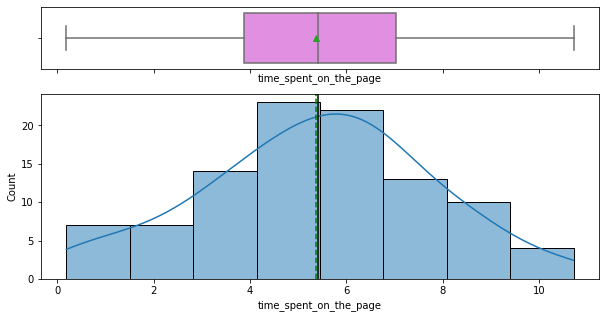

In [41]:
# Plot time_spent_on_the_page data to analyse distribution pattern
histogram_boxplot(df, "time_spent_on_the_page", figsize=(10, 5), kde = True)

#### Observations
1. The time spent on webpage ranges from 0 to 10 minutes.
2. Nearly 50% of the users spends approximately 5 minutes on landing page. 
3. The average time spent on the page is also nearly 5 minutes.
4. The data has a normal distribution. The mean is same as the median of the data. 
4. There are no outliers in the data. 

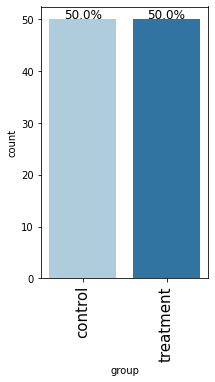

In [43]:
# Calling the labeled_barplot function defined above for group variable
labeled_barplot(df, "group", perc=True, n=None)

#### Observations:
- The 100 users are equally divided into Control and Treatment groups each with 50 users. 

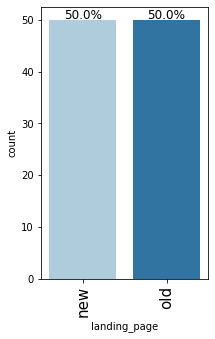

In [47]:
# Calling the labeled_barplot function defined above for landing_page variable
labeled_barplot(df, "landing_page", perc=True, n=None)

#### Observations:
- 50 users are redirected to the new landing page and 50 to the old landing page.

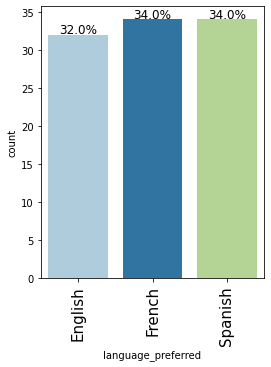

In [45]:
# Calling the labeled_barplot function defined above for language_preferred variable
labeled_barplot(df, "language_preferred", perc=True, n=None)

#### Observations:
There are 3 preferred languages - French, Spanish and English. French and Spanish have 34 users each whereas 32 users preferred English. 

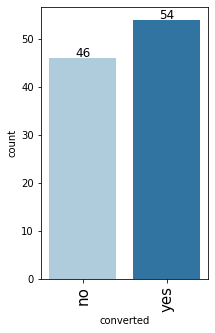

In [48]:
# Calling the labeled_barplot function defined above for converted variable
labeled_barplot(df, "converted", perc=False, n=None)

#### Observations:
54 users got converted to subscribers, whereas 46 users did not get converted after visiting the landing page.

### Bivariate Analysis

<b> Time spent on the type of landing page by language preferred </b>

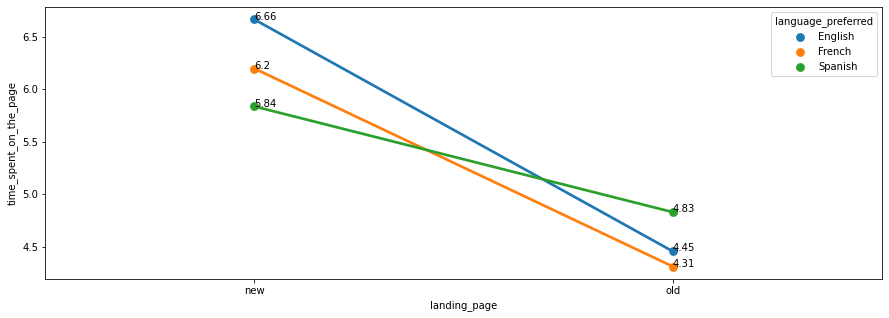

In [57]:
plt.figure(figsize=(15,5))

# seaborn pointplot to analyse time_spent_on_the_page against landing page type by preferred language 
ax = sns.pointplot(data = df, x = "landing_page", 
                   y = "time_spent_on_the_page", hue = "language_preferred",
                   ci=None)
for c in ax.collections:         
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)

plt.show()

#### Observations:
1. Overall, the average time spent on old landing page is less than the average time spent on the new landing page. The users across all three preferred languages have spent more time on the new landing page.
2. On the new landing page, English users have spent maximum time, followed by French and Spanish. 
3. On the old landing page, French users have spent least time. 
4. On an average, Spanish users have spent more time on old landing page than other languages, whereas users with the same preferred language have spent less time on new landing page than other languages. 

<b> Converted Vs Time spent on the type of landing page</b>

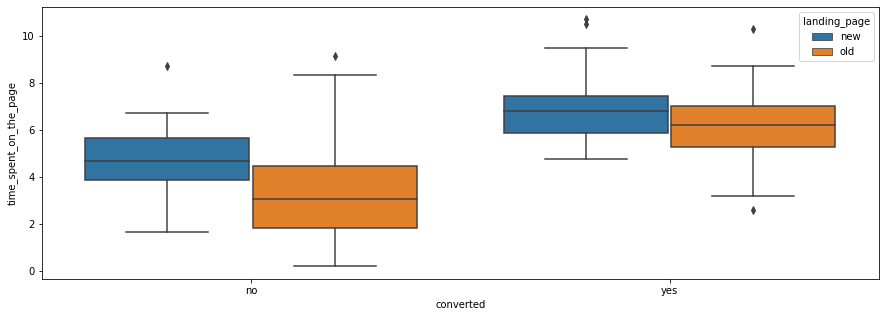

In [61]:
plt.figure(figsize=(15,5))

# seaborn boxplot to analyse time spent on the page against converted by type of landing page
sns.boxplot(data = df, x = "converted", 
                   y = "time_spent_on_the_page", hue = "landing_page")
plt.show()

#### Observations:
1. Overall, the converted users have spent more time across new and old landing page, than those who haven't.
2. Across converted and not converted, users have spent less time on old landing page than the new one. 
3. The median values of time spent on old and new page for converted users are fairly close, compared to those who haven't converted. 
4. There are few outliers in the data across converted and not converted users on both old and new landing page. 

<b> Time spent on the page by preferred language and converted </b>

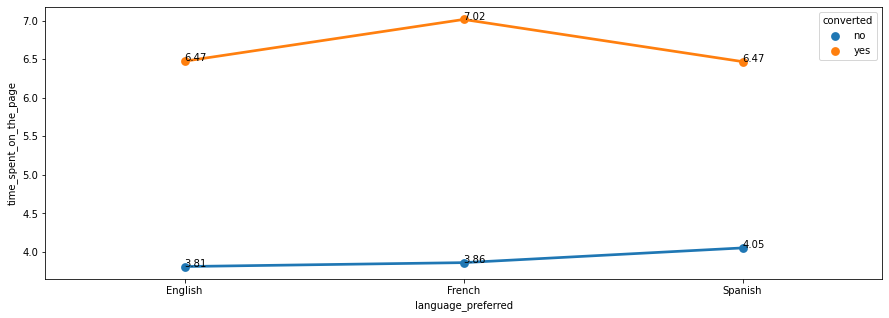

In [56]:
plt.figure(figsize=(15,5))

# seaborn pointplot to analyse time_spent_on_the_page against preferred language by converted 
ax = sns.pointplot(data = df, x = "language_preferred", 
                   y = "time_spent_on_the_page", hue = "converted",
                   ci=None)
for c in ax.collections:         
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)

plt.show()

#### Observations:
1. The not converted users have spent less time on the page across all three languages than those who've converted. 
2. Among the <b> converted users </b>, users with French preference have spent maximum time on the page. Users with English and Spanish have the same average time spent on the page. 
3. Among the <b> not converted users </b>, users with Spanish preference have spent maximum time on the page than French and English.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

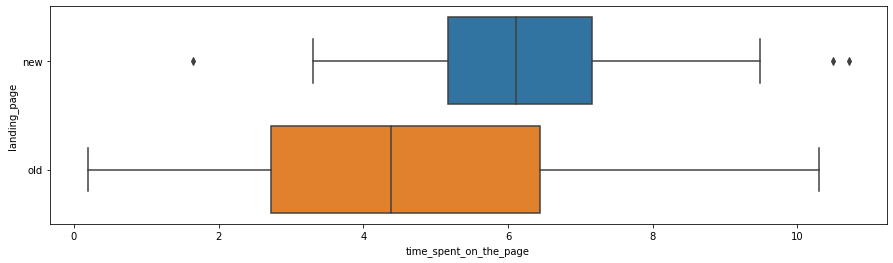

In [60]:
plt.figure(figsize=(15,4))

# seaborn boxplot to analyse time spent on the page by type of landing page
sns.boxplot(data = df, y = "landing_page", 
                   x = "time_spent_on_the_page")
plt.show()

####  Insight
1. The sample data suggests that on an average users spend less time on old landing page than the new one. 
2. The maximum time spent on the old landing page is greater than the maximum time on the new landing page.
3. The variable has a wider range for old landing page than the new landing page. 

In [164]:
# find the sample means and sample standard deviations for the users in control and treatment groups

print("The mean time spent on new landing page " + str(np.round(df["time_spent_on_the_page"][df["landing_page"]=="new"].mean(),1)))
print('The standard deviation of time spent on new landing page is ' + str(np.round(df["time_spent_on_the_page"][df["landing_page"]=="new"].std(),1)))

print("The mean time spent on old landing page " + str(np.round(df["time_spent_on_the_page"][df["landing_page"]=="old"].mean(),1)))
print('The standard deviation of time spent on old landing page is ' + str(np.round(df["time_spent_on_the_page"][df["landing_page"]=="old"].std(),1)))



The mean time spent on new landing page 6.2
The standard deviation of time spent on new landing page is 1.8
The mean time spent on old landing page 4.5
The standard deviation of time spent on old landing page is 2.6


### Step 1: Define the null and alternate hypotheses

Consider


$µ_n$ - Population mean time spent on the new landing page.

$µ_o$ - Population mean time spent on the old landing page.

The null hypothesis is that the users spend same amount of time on both the landing pages, i.e. the average time spent on the new landing page is same as the average time spent on the old landing page. 

$H_0$: $µ_n$ = $µ_o$ 

The alternative hypothesis is that the average time spent on the new landing page is more than the average time on the old landing page. 

$H_a$: $µ_n$ > $µ_o$ 

### Step 2: Select Appropriate test

#### Since the population mean and standard deviation is unknown, check whether T-test assumptions are satisfied or not

* Continuous data - The time spent on the page is measured on a continuous scale.
* Normally distributed populations - As it can be seen from the univariate analysis of time_spent_on_the_page variable for given 100 users, the data has normal distribution. 
* Independent populations - Since the users are randomly assigned to control and treatment groups, the two groups can be considered independent. There is no information about how one group affects another. 
* Unequal population standard deviations - As the sample standard deviations are different as seen above, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

### Step 3: Decide the significance level

The level of significance needs to be considered as 0.05 as mentioned in the objective.

α = 0.05

### Step 4: Collect and prepare data

In [165]:
#create separate dataframes for old and new users
time_spent_old_page = df["time_spent_on_the_page"][df["landing_page"]=="old"]
time_spent_new_page = df["time_spent_on_the_page"][df["landing_page"]=="new"]

### Step 5: Calculate the p-value

In [166]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new_page, time_spent_old_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [167]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Insight
<b> As the p-value (~0.0001) is less than the level of significance (0.05), we can reject the null hypothesis. Hence, we do have enough evidence to support that the users spend more time on the new landing page than the existing landing page </b>

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

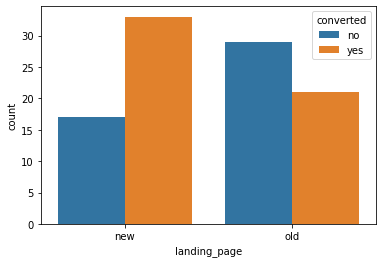

In [101]:
sns.countplot(x="landing_page", hue="converted", data=df);

####  Insight
The sample data suggests that the conversion rate for the new page is greater than the conversion rate of the old landing page.

### Step 1: Define the null and alternate hypotheses

Consider


$p_n$ - Proportion of users who visit the new landing page and get converted.

$p_o$ - Proportion of users who visit the old landing page and get converted.

The null hypothesis is that the conversion rate for the new landing page is same as the conversion rate of the old landing page. 

$H_0$: $p_n$ = $p_o$ 

The alternative hypothesis is that the conversion rate for the new landing page is greater than the conversion rate of the old landing page.

$H_a$: $p_n$ > $p_o$ 

### Step 2: Select Appropriate test

Since this is a test of proportion, check whether the Z-test assumptions for proportions are satisfied or not.

*   Binomally distributed population - The users are either converted or not converted (Values - Yes or No)
*   Random sampling from the population - The users are randomly selected, and randomly divided into control and treatment groups
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 3: Decide the significance level

The level of significance needs to be considered as 0.05 as mentioned in the objective.

α = 0.05

### Step 4: Collect and prepare data

In [168]:
# Users in the treatment group are assigned new landing page, and control group are assigned old landing page
# Find the sample size of each group
new_page_sample_size = df[df["group"]=="treatment"].group.count()
old_page_sample_size = df[df["group"]=="control"].group.count()

#Find converted users in the new and old landing page
new_converted = df[(df["group"]=="treatment") & (df["converted"]=="yes")].converted.count()
old_converted = df[(df["group"]=="control") & (df["converted"]=="yes")].converted.count()

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(new_page_sample_size, old_page_sample_size ))
print('The numbers of converted users who were served the new page are {}'.format(new_converted))
print('The numbers of converted users who were served the old page are {}'.format(old_converted))


The numbers of users served the new and old pages are 50 and 50 respectively
The numbers of converted users who were served the new page are 33
The numbers of converted users who were served the old page are 21


### Step 5: Calculate the p-value

In [169]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users in control and treatment group
converted_count = np.array([33, 21])

# set the sample sizes
users = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, users)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [170]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Insight
<b> As the p-value (~0.016) is less than the level of significance (0.05), we can reject the null hypothesis. Hence, we do have enough evidence to support that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page </b>

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

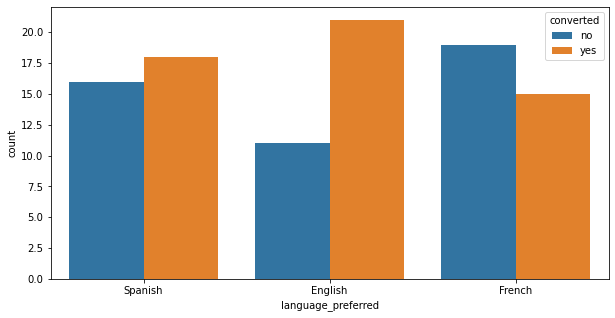

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(x="language_preferred", hue="converted", data=df);
plt.show()

####  Insight
1. The sample data shows that the conversion rate for users with preferred language as English is the highest, followed by Spanish and French. But it doesn't conclusively illustrate if there is a real dependency between the two variables. 
2. French has less converted users than those not converted. 

### Step 1: Define the null and alternate hypotheses

Null hypothesis

>$H_0:$ Conversion and preferred language are independent of each other.

Alternate hypothesis

>$H_a:$ Conversion and preferred language are related. 

### Step 2: Select Appropriate test

#### Since both the variables are categorical, check if Chi-Square test for independence are satisfied. 

* Categorical variables - Both Conversion and Preferred language are categorical. 
* Expected value of the number of sample observations in each level of the variable is at least 5 - We can see from the above graph that number of observations in each level is greater than 5. 
* Random sampling from the population - It has been mentioned in the problem statement that the collected sample is a simple random sample.

We can use Chi-Square test for independence 

### Step 3: Decide the significance level

The level of significance needs to be considered as 0.05 as mentioned in the objective.

α = 0.05

### Step 4: Collect and prepare data

In [176]:
# create a contigency table to show the distribution of data across converted and pereferred language
contigency_table = pd.crosstab(df.converted, df.language_preferred, margins = True, margins_name = "Total")
contigency_table

language_preferred,English,French,Spanish,Total
converted,,,,
no,11,19,16,46
yes,21,15,18,54
Total,32,34,34,100


### Step 5: Calculate the p-value

In [177]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contigency_table)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


### Step 6: Compare the p-value with $\alpha$

In [178]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.7970832186581233 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

### Insight
<b> As the p-value (~0.797) is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, we do not have enough evidence to support that conversion and preferred language are related. </b>

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

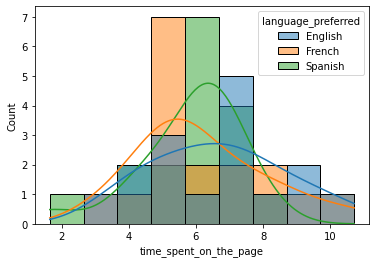

In [161]:
# Plot histogram for visualisation
sns.histplot(data=df[df["landing_page"]=="new"],x = "time_spent_on_the_page",hue="language_preferred",kde=True);

####  Insight
1. For the sample, the time spent data on the new page appears to approach normal distribution for all three languages, with Spanish showing the most normal distribution of all three.


### Step 1: Define the null and alternate hypotheses

#### Test of equality of means
Consider $\mu_E, \mu_F, \mu_S$ be the means of time spent on the new landing page for preferred language English, French and Spanish respectively.

Null hypothesis

>$H_0: \mu_E = \mu_F = \mu_S$

against the alternative hypothesis

>$H_a: $ At least one mean value is different from the rest.


#### Shapiro-Wilk’s test - For test of normal distribution

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

#### Levene’s test - For test of equality of variance

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

### Step 2: Select Appropriate test

* Test equality of means.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

Here the response variable is time_spent_on_the_page and factor is language_preferred.

### Step 3: Decide the significance level

The level of significance needs to be considered as 0.05 as mentioned in the objective.

α = 0.05

### Step 4: Collect and prepare data

  language_preferred  mean_time_spent
0            English         6.663750
1             French         6.196471
2            Spanish         5.835294


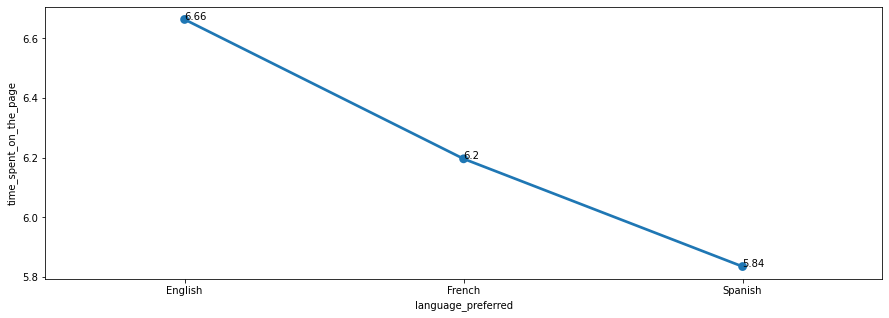

In [160]:
# Calculate the mean time spent on the new page for different language users
mean_time_by_language =  df[["language_preferred","time_spent_on_the_page"]][df["landing_page"]=="new"].groupby(["language_preferred"])["time_spent_on_the_page"].mean().reset_index()

# Rename order count column 
mean_time_by_language.rename(columns={"time_spent_on_the_page":"mean_time_spent"}, inplace = True)

print(mean_time_by_language)

plt.figure(figsize=(15,5))

# seaborn pointplot to analyse time spent on the new landing page by preferred language 
ax = sns.pointplot(data = df[df["landing_page"]=="new"], x = "language_preferred", 
                   y = "time_spent_on_the_page",
                   ci = None)
for c in ax.collections:         
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)

plt.show()


### Step 5: Calculate the p-value and compare with $\alpha$

#### Shapiro-Wilk’s test - For test of normal distribution

In [150]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df[df['landing_page'] == 'new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Compare the p-value with $\alpha$

In [151]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


#### Levene’s test - For test of equality of variance

In [154]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df[(df['landing_page'] == 'new') & (df['language_preferred']=="English")]['time_spent_on_the_page'], 
                             df[(df['landing_page'] == 'new') & (df['language_preferred']=="French")]['time_spent_on_the_page'], 
                             df[(df['landing_page'] == 'new') & (df['language_preferred']=="Spanish")]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


#### Compare the p-value with $\alpha$

In [155]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


#### Conclusion

1. The populations are normally distributed - <b> Yes, the normality assumption is verified using the Shapiro-Wilk’s test.</b>
2. Population variances are equal - <b> Yes, the homogeneity of variance assumption is verified using the Levene's test.</b>

Also, we know that the collected sample is a simple random sample. This qualifies for a f-one way test

In [156]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df[(df['landing_page'] == 'new') & (df['language_preferred']=="English")]['time_spent_on_the_page'], 
                             df[(df['landing_page'] == 'new') & (df['language_preferred']=="French")]['time_spent_on_the_page'], 
                             df[(df['landing_page'] == 'new') & (df['language_preferred']=="Spanish")]['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


#### Compare the p-value with $\alpha$

In [157]:
if p_value < 0.05:
    print("Since the p-value {} is less than the level of significance, we reject the null hypothesis.".format(p_value))
else:
    print("Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.".format(p_value))
    

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

### Insight 
<b> As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one language has different time spent on the new landing page than others. </b>

## Conclusion and Business Recommendations

### Conclusions
Below are some inferences about the population we could derive from the given sample. 
1. Overall, users have time spent more time on the new landing page than the old landing page.
2. More users in the treatment group who were served with the new landing page got converted to subscribers, than those in the control group, i.e. the conversion rate on the new landing page is higher than the old landing page. 
3. The sample data suggests that the converted users in both control and treatment group have spent more time on the landing pages (both old and new), than those who haven't.
4. Although the sample data suggests that there are more converted users with preferred language as English, there is not enough statistical evidence to conclude that conversion rate has any dependency on preferred language. 
5. Although the sample data suggests that users with preferred language English have spent more time on the new landing page, there is not enough statistical evidence to support that the times spent on the new landing page varies by preferred language. 


### Business Recommendations
1. Since the new landing page is attracting more subscribers, it can be rolled out on the news portal. 
2. More observations are needed to understand if preferred language is influencing the time a user spends on the landing page, thereby impacting conversion rate / subscriptions.
3. Since the time spent on the new landing page is resulting in increased conversion rate, it's imperative to keep relevant and most up-to-date information on the new landing page in a user friendly view to retain subscribers (low churn rate)  